# Heart Disease Risk Prediction

This turorial gives a step by step guide to deal with data and how to build different machine learning models to predict Heart Attack Risk. Rather what could be the possible models that can be learnt using the given data.
Very first thing is to analyse our data. So let us have a look into a data. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

# Load Data from current directory
heart_data = pd.read_csv("heart.csv")
# Know row-col information of your data
heart_data.shape 
#Lets try to print 10 rows of the data
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


 Apparantly this is a very small dataset to play with.
 Shape of data is: (303, 14) 
 Your Data(First 5 rows only printed) should look like this:  
       age sex cp trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	target
    0	63	1	3	145	    233	     1	  0	     150	  0       2.3	  0	     0	 1	      1
    1	37	1	2	130	    250	     0	  1	     187	  0       3.5	  0	     0	 2	      1
    2	41	0	1	130	    204	     0	  0	     172	  0	      1.4	  2	     0	 2	      1
    3	56	1	1	120	    236	     0	  1	     178	  0	      0.8	  2	     0	 2	      1
    4	57	0	0	120	    354	     0	  1	     163	  1	      0.6	  2	     0	 2	      1

In [2]:
#Get little more insights into data in statistical point of view
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


All the attribute's stats should get enlisted like this table.

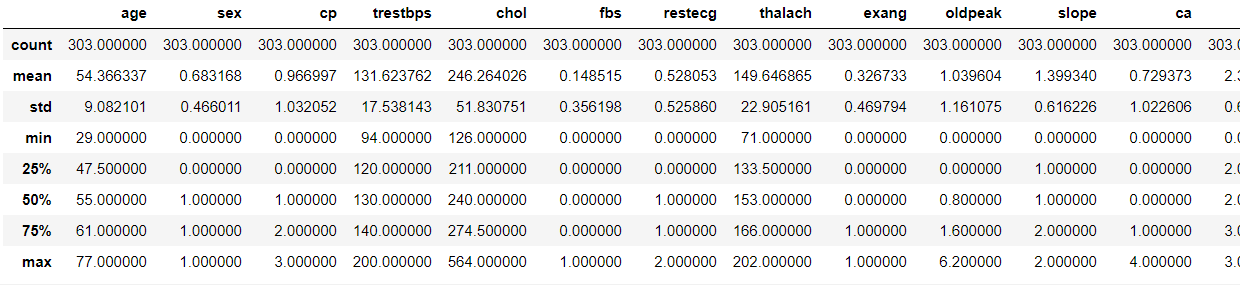

Note: You should understand that it seems all numeric data. But few variables are categorical. Hence we must convert few variables into factor variables before building a machine learning model. The Target is a dependent variable and it is binary (0,1). Hence we can understand that the basic task is to predict if a person gets a heart attack or not based on Target variable value.
If Target = 1, a person has higher chances of getting a heart attack 
If Target = 0, a person doesnot have that risk.

In [3]:
#Make a new data frame to keep original data intact
hdata = pd.DataFrame() # create a blank dataframe
hdata = heart_data.copy(deep=True) # Make a deep copy
hdata
#We will work on new dataframe hdata 
hdata.info()  # None of the column contains NA or missing values. So no need to do imputing task
#hdata.count() 
# As per data, Change Few columns like sex, cp, fbs, restecg, exang, Target to the factor data
hdata['sex'] = hdata['sex'].astype('category')
hdata['cp'] = hdata['cp'].astype('category')
hdata['fbs'] = hdata['fbs'].astype('category')
hdata['restecg'] = hdata['restecg'].astype('category')
hdata['exang'] = hdata['exang'].astype('category')
hdata['target'] = hdata['target'].astype('category')

#for easy handiling lets make separate copies of numeric and categorical data
all_cols = set(hdata.columns)
cat_cols = set(['sex','cp','fbs','restecg','exang','target'])
num_cols = all_cols.difference(cat_cols)
print(list(num_cols))

hdata.info()

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
['age', 'thalach', 'thal', 'chol', 'slope', 'oldpeak', 'trestbps', 'ca']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
-

You must get following output with changed data types.

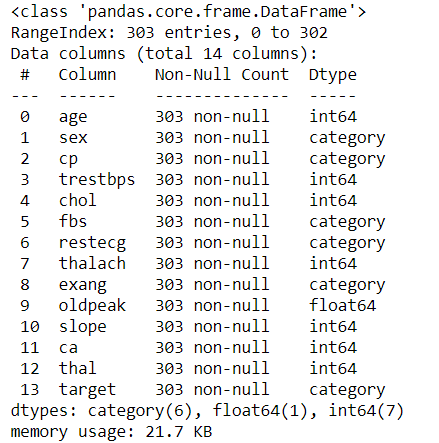

So its a basic  binary classification task. For that task we have plenty of algorithms to work with:
1 : Logistic Regression (Log Reg)
2 : K-Nearest Neighbour (kNN)
3 : Support Vector Machine (SVM)
4 : Decision Tree (DT)
5 : Random Forest (RF)
Let us have look at them one by one.

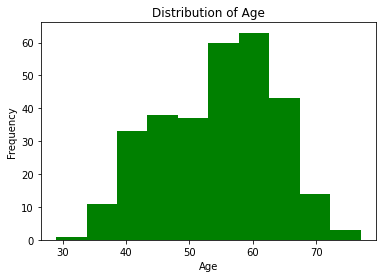

In [4]:
#Let us visualize numerical data, how it is distributed using histogram
from matplotlib import pyplot as plt

counts, bins = np.histogram(hdata['age'])
plt.hist(bins[:-1], bins, weights=counts,color='g')   
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

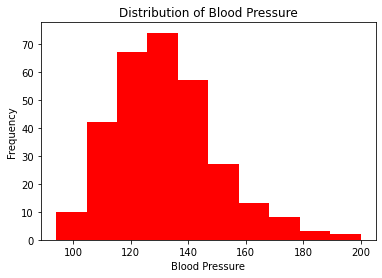

In [5]:
counts, bins = np.histogram(hdata['trestbps'])
plt.hist(bins[:-1], bins, weights=counts,color='r')  
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()


Blood Pressure is right skewed curve and hence we need to remove this skewness first otherwise our model will give biased decisions.

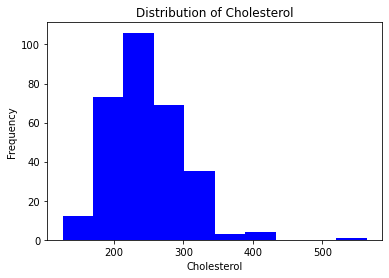

In [6]:
# Plot Cholesterol distribution
counts, bins = np.histogram(hdata['chol'])
plt.hist(bins[:-1], bins, weights=counts,color='b')  
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

Cholesterol feature seems normally distributed. So no need to do further processing.

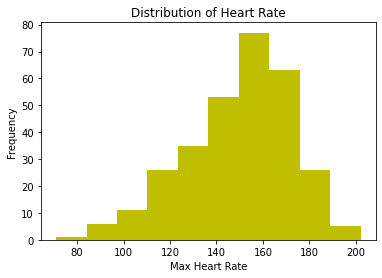

In [7]:
# Plot heart rate
counts, bins = np.histogram(hdata['thalach'])
plt.hist(bins[:-1], bins, weights=counts,color='y')  
plt.title('Distribution of Heart Rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

Heart rate is left skewed curve and hence we need to remove this skewness first otherwise our model will give biased decisions.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5647058e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a564705fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a564705550>,
 'medians': [<matplotlib.lines.Line2D at 0x1a5647146a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a564714a00>,
 'means': []}

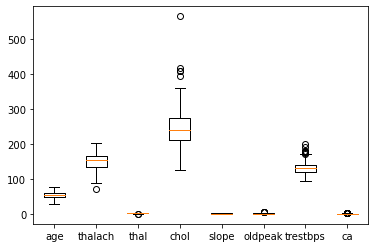

In [8]:
#Lets first analyse a boxplot for all the features in one go
plt.boxplot(hdata[num_cols],labels=num_cols)



274.5
211.0
140.0
120.0
166.0
133.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1a56466c9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a56468f2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a56466c190>,
 'medians': [<matplotlib.lines.Line2D at 0x1a56468fa30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a56468f040>,
 'means': []}

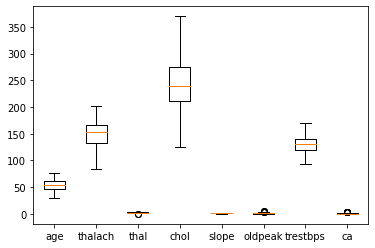

In [9]:
#Replace ouliers from 'chol', 'trestbps', and 'thalach'
#values more than q3+1.5TQR will be replaced by q3+1.5TQR(max) and values less than q1-1.5TQR will be replaced by q1-1.5TQR(min)

#Outlier removal from 'chol'
q3 = hdata['chol'].quantile(0.75)
print(q3)
q1 = hdata['chol'].quantile(0.25)
print(q1)
IQR = (q3-q1)*1.5
mi = q1-IQR
ma = q3+IQR
hdata['chol'] = hdata['chol'].apply(lambda x: ma if x>ma else x, hdata['chol'].item)
hdata['chol'] = hdata['chol'].apply(lambda x: mi if x<mi else x, hdata['chol'].item)   

#Outlier removal from 'trestbps'
q3 = hdata['trestbps'].quantile(0.75)
print(q3)
q1 = hdata['trestbps'].quantile(0.25)
print(q1)
IQR = (q3-q1)*1.5
mi = q1-IQR
ma = q3+IQR
hdata['trestbps'] = hdata['trestbps'].apply(lambda x: ma if x>ma else x, hdata['trestbps'].item)
hdata['trestbps'] = hdata['trestbps'].apply(lambda x: mi if x<mi else x, hdata['trestbps'].item) 

#outlier removal from 'thalach'
q3 = hdata['thalach'].quantile(0.75)
print(q3)
q1 = hdata['thalach'].quantile(0.25)
print(q1)
IQR = (q3-q1)*1.5
mi = q1-IQR
ma = q3+IQR
hdata['thalach'] = hdata['thalach'].apply(lambda x: ma if x>ma else x, hdata['thalach'].item)
hdata['thalach'] = hdata['thalach'].apply(lambda x: mi if x<mi else x, hdata['thalach'].item) 


#Lets check if ouliers are removed or not using boxplot
plt.boxplot(hdata[num_cols],labels=num_cols)


The above plot is now clear and free from outliers. 

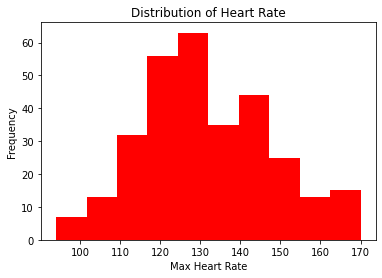

In [12]:
# Lets check distribution of one of the data column: Plot heart rate 
counts, bins = np.histogram(hdata['trestbps'])
plt.hist(bins[:-1], bins, weights=counts,color='r')  
plt.title('Distribution of Heart Rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

You can clearly observe the change in the heart rate histogram after oulier removal. The data distribution is towards a normal curve. Hence we are ready to work with the data now. 
We will try to build machine learning models through training using our data.

In [19]:
#Before running into the models let us first spilt data into train test split using cross validation
from sklearn.model_selection import train_test_split
import numpy as np

num_cols = list(num_cols)

#Normalize the data to avoid the effects of different scales (excluding the target column)
hdata[num_cols] = (hdata[num_cols] - np.min(hdata[num_cols])) / (np.max(hdata[num_cols]) - np.min(hdata[num_cols]))
#input_set = (heart_data - np.min(heart_data)) / (np.max(heart_data) - np.min(heart_data)).values

#create input set containing only independent variables: all columns other than 'target'
input_set = hdata.copy(deep=True)
input_set.drop(['target'],axis=1,inplace=True)

#Get lables or output set
target_set = hdata['target'] 

#Get train test data ready
print(input_set)
print(target_set)

train_Data, test_Data, train_Target, test_Target = train_test_split(input_set,target_set,test_size=0.2)
print('Train Data= \n {} \n Test Data =\n {} \n Train Target = \n {} \n Test Target = \n {}'.format(train_Data,test_Data,train_Target,test_Target))

          age sex cp  trestbps      chol fbs restecg   thalach exang  \
0    0.708333   1  3  0.671053  0.438974   1       0  0.556503     0   
1    0.166667   1  2  0.473684  0.508718   0       1  0.872068     0   
2    0.250000   0  1  0.473684  0.320000   0       0  0.744136     0   
3    0.562500   1  1  0.342105  0.451282   0       1  0.795309     0   
4    0.583333   0  0  0.342105  0.935385   0       1  0.667377     1   
..        ...  .. ..       ...       ...  ..     ...       ...   ...   
298  0.583333   0  0  0.605263  0.471795   0       1  0.326226     1   
299  0.333333   1  3  0.210526  0.566154   0       1  0.402985     0   
300  0.812500   1  0  0.657895  0.274872   1       1  0.479744     0   
301  0.583333   1  0  0.473684  0.020513   0       1  0.257996     1   
302  0.583333   0  1  0.473684  0.451282   0       0  0.761194     0   

      oldpeak  slope    ca      thal  
0    0.370968    0.0  0.00  0.333333  
1    0.564516    0.0  0.00  0.666667  
2    0.225806    1

As shown in the output the Train Test split function applied to the dataset created a Train Dataset with [242 rows x 13 columns], a Test Dataset with [61 rows x 13 columns], and target (labels) of the corresponding data is available in train_Target and test_Target variables.

# Classification using Logistic Regression

In [36]:
#For implementing we will use logistic regression module from linear_model of sklearn library
from sklearn.linear_model import LogisticRegression

#create a Logistic regression blank model
LogReg = LogisticRegression()

#Train the model using train data and labels
LogReg.fit(train_Data,train_Target)

#Run the trained model 'LogReg' on test data
pred_labels = LogReg.predict(test_Data)
print("Logistic Regression Model Predictions \n\n ", pred_labels)

#Let us have look into the probabilities predicted by logit funtion
pred_prob = LogReg.predict_proba(test_Data)
print("Logistic Regression Model Predicted Probabilities \n\n ", pred_prob)

#Let us check the trainig accuracy of the model
print("Traning Accuracy is ",round(LogReg.score(train_Data,train_Target),2))

#Let us check the testing accuracy of the model
print("Testing Accuracy is ",round(LogReg.score(test_Data,test_Target),2))


Logistic Regression Model Predictions 

  [1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1]
Logistic Regression Model Predicted Probabilities 

  [[0.03973432 0.96026568]
 [0.79285401 0.20714599]
 [0.07248869 0.92751131]
 [0.83936688 0.16063312]
 [0.05346129 0.94653871]
 [0.27031114 0.72968886]
 [0.34879955 0.65120045]
 [0.9734083  0.0265917 ]
 [0.93645253 0.06354747]
 [0.72919659 0.27080341]
 [0.52946503 0.47053497]
 [0.23291894 0.76708106]
 [0.14944696 0.85055304]
 [0.65532776 0.34467224]
 [0.15152522 0.84847478]
 [0.08985562 0.91014438]
 [0.98189715 0.01810285]
 [0.32076112 0.67923888]
 [0.16277492 0.83722508]
 [0.56737799 0.43262201]
 [0.63707026 0.36292974]
 [0.01526968 0.98473032]
 [0.86877804 0.13122196]
 [0.81102233 0.18897767]
 [0.14528736 0.85471264]
 [0.28753025 0.71246975]
 [0.86028038 0.13971962]
 [0.20513026 0.79486974]
 [0.95693541 0.04306459]
 [0.08780117 0.91219883]
 [0.25639329 0.74360671]
 [0.